# Graded Challange 1 - Andik Al Fauzi

## Description

### Objective

Data Diri
Andik Al Fauzi - FTDS-RMT-018

Latar Belakang Masalah
Sejak tahun 2019 Covid-19 mulai merebak dihampir seluruh dunia, menjadikan hal ini suatu wabah dan ancaman yang serius bagi masing-masing negara yang terjangkit sehingga diperlukan adanya record data dan riwayat dari masing-masing penduduk di negara tersebut. Recording data tersebut dibuat dalam satu database menyeluruh, sehingga dapat dengan mudah diakses oleh siapapun untuk dijadikan langkah penanggulangan dan pencegahan agar virus Covid-19 tersebut tidak semakin meluas. Khususnya di negara Amerika yang memiliki jumlah populasi yang besar dan dibagi menjadi beberapa negara bagian.

### Problem Statement

1. Total penduduk United States yang terjangkit virus Covid-19 sampai dengan tahun 2022?
2. Total penduduk United States yang meninggal sampai tahun 2022 karena virus Covid-19?
3. Kota mana saja di United States sajakah yang menjadi top 5 pandemi Covid-19?
4. Total penduduk United States yang berhasil sembuh dari Covid-19 sampai dengan tahun 2022? 

## Working Area

```txt
Put your code, analysis, everything below this line

Make sure to check everything the rubric requires before you submit
```

In [1]:
import pandas as pd
import numpy as np

# Query from Big Query
# select * from bigquery-public-data.covid19_jhu_csse_eu.summary 
# then export to local and save as name is summaryFromBigQuery.csv 

In [2]:
# Load CSV Datatable

df = pd.read_csv('summaryFromBigQuery.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34391 entries, 0 to 34390
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  32865 non-null  object 
 1   country_region  34391 non-null  object 
 2   date            34391 non-null  object 
 3   latitude        33670 non-null  float64
 4   longitude       33670 non-null  float64
 5   location_geom   33670 non-null  object 
 6   confirmed       34391 non-null  int64  
 7   deaths          34391 non-null  int64  
 8   recovered       15164 non-null  float64
 9   active          15158 non-null  float64
 10  fips            28762 non-null  float64
 11  admin2          28784 non-null  object 
 12  combined_key    34391 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 3.4+ MB


Dari info tersebut dapat sementara disimpulkan bahwa ada 32865 baris data yang terisi di kolom province_state, sedangkan sisanya 1526 baris data berupa data kosong yang bisa kita singkirkan nantinya.

In [3]:
copyDF = df.copy()

In [4]:
# Rename Column province_state

copyDF = copyDF.rename(columns={'province_state' : 'province'})

# Rename Column country_region

copyDF = copyDF.rename(columns={'country_region' : 'country'})

# Declare new column : year

copyDF['year_id'] = pd.DatetimeIndex(copyDF['date']).year

# Declare new column : survive

copyDF["survive"] = copyDF["confirmed"] - copyDF["deaths"]

In [5]:
# Drop unused column

locDrop = ['latitude', 'longitude', 'location_geom']
copyDF.drop(locDrop, inplace=True, axis=1)

adminDrop = ['admin2', 'combined_key']
copyDF.drop(adminDrop, inplace=True, axis=1)

fipsDrop = ['fips']
copyDF.drop(fipsDrop, inplace=True, axis=1)

In [6]:
copyDF.shape

(34391, 9)

In [7]:
testDF1 = copyDF.copy()

In [8]:
testDF1.isna()

,province,country,date,confirmed,deaths,recovered,active,year_id,survive
0,False,False,False,False,False,True,True,False,False
1,False,False,False,False,False,True,True,False,False
2,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,True,True,False,False
4,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...
34386,False,False,False,False,False,True,True,False,False
34387,False,False,False,False,False,True,True,False,False
34388,False,False,False,False,False,True,True,False,False
34389,False,False,False,False,False,True,True,False,False


In [9]:
testDF1.isna().sum()

province      1526
country          0
date             0
confirmed        0
deaths           0
recovered    19227
active       19233
year_id          0
survive          0
dtype: int64

In [10]:
# Handle missing values for column province

testDF1['province'] = testDF1['province'].fillna("Unknown_Province")

# Fill column recoverd with 0 value

testDF1['recovered'] = testDF1['recovered'].fillna(0)

# Fill column active with 0 value

testDF1['active'] = testDF1['active'].fillna(0)

# Drop Column Flip

# testDF1.drop(testDF1['fips'], inplace=True, axis=1)

In [11]:
testDF1.isna().sum()

province     0
country      0
date         0
confirmed    0
deaths       0
recovered    0
active       0
year_id      0
survive      0
dtype: int64

In [12]:
testDF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34391 entries, 0 to 34390
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   province   34391 non-null  object 
 1   country    34391 non-null  object 
 2   date       34391 non-null  object 
 3   confirmed  34391 non-null  int64  
 4   deaths     34391 non-null  int64  
 5   recovered  34391 non-null  float64
 6   active     34391 non-null  float64
 7   year_id    34391 non-null  int64  
 8   survive    34391 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 2.4+ MB


In [13]:
# # Merge & Drop Province & Country Column
testDF1.drop(['recovered', 'active'], axis=1, inplace=True)
print(testDF1.head())

      province country        date  confirmed  deaths  year_id  survive
0    Minnesota      US  2021-11-30       1206      16     2021     1190
1    Minnesota      US  2021-11-30      25830     216     2021    25614
2  Mississippi      US  2021-11-30       6451     151     2021     6300
3  Mississippi      US  2021-11-30       1749      41     2021     1708
4  Mississippi      US  2021-11-30       3161      67     2021     3094


In [14]:
# DFIndex = testDF1.set_index(testDF1["Country/Province", "date", "year_id", "confirmed", "deaths", "survive"], inplace=True, append=True)
# IndexDF.sort_index()
# print(IndexDF.head())

DF_Index = {"Country/Province", "date", "year_id", "confirmed", "deaths", "survive"}
DF_Index = pd.DataFrame(testDF1)
DF_Index.sort_index
print(DF_Index)

          province country        date  confirmed  deaths  year_id  survive
0        Minnesota      US  2021-11-30       1206      16     2021     1190
1        Minnesota      US  2021-11-30      25830     216     2021    25614
2      Mississippi      US  2021-11-30       6451     151     2021     6300
3      Mississippi      US  2021-11-30       1749      41     2021     1708
4      Mississippi      US  2021-11-30       3161      67     2021     3094
...            ...     ...         ...        ...     ...      ...      ...
34386    Louisiana      US  2022-09-21      16183     149     2022    16034
34387    Louisiana      US  2022-09-21       2124      25     2022     2099
34388    Louisiana      US  2022-09-21      12470     186     2022    12284
34389    Louisiana      US  2022-09-21      14504     196     2022    14308
34390    Louisiana      US  2022-09-21      14607     275     2022    14332

[34391 rows x 7 columns]


In [15]:
DF_Index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34391 entries, 0 to 34390
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   province   34391 non-null  object
 1   country    34391 non-null  object
 2   date       34391 non-null  object
 3   confirmed  34391 non-null  int64 
 4   deaths     34391 non-null  int64 
 5   year_id    34391 non-null  int64 
 6   survive    34391 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.8+ MB


In [16]:
DF_Index.head(10)

,province,country,date,confirmed,deaths,year_id,survive
0,Minnesota,US,2021-11-30,1206,16,2021,1190
1,Minnesota,US,2021-11-30,25830,216,2021,25614
2,Mississippi,US,2021-11-30,6451,151,2021,6300
3,Mississippi,US,2021-11-30,1749,41,2021,1708
4,Mississippi,US,2021-11-30,3161,67,2021,3094
5,Mississippi,US,2021-11-30,4570,95,2021,4475
6,Mississippi,US,2021-11-30,33270,432,2021,32838
7,Mississippi,US,2021-11-30,34920,557,2021,34363
8,Mississippi,US,2021-11-30,2718,89,2021,2629
9,Mississippi,US,2021-11-30,1321,39,2021,1282


In [17]:
'date' in DF_Index.index

False

In [18]:
DF_Index.set_index(['year_id', 'country'])

province        date  confirmed  deaths  survive
year_id country                                                     
2021    US         Minnesota  2021-11-30       1206      16     1190
        US         Minnesota  2021-11-30      25830     216    25614
        US       Mississippi  2021-11-30       6451     151     6300
        US       Mississippi  2021-11-30       1749      41     1708
        US       Mississippi  2021-11-30       3161      67     3094
...                      ...         ...        ...     ...      ...
2022    US         Louisiana  2022-09-21      16183     149    16034
        US         Louisiana  2022-09-21       2124      25     2099
        US         Louisiana  2022-09-21      12470     186    12284
        US         Louisiana  2022-09-21      14504     196    14308
        US         Louisiana  2022-09-21      14607     275    14332

[34391 rows x 5 columns]

In [19]:
DF_Index.describe

<bound method NDFrame.describe of           province country        date  confirmed  deaths  year_id  survive
0        Minnesota      US  2021-11-30       1206      16     2021     1190
1        Minnesota      US  2021-11-30      25830     216     2021    25614
2      Mississippi      US  2021-11-30       6451     151     2021     6300
3      Mississippi      US  2021-11-30       1749      41     2021     1708
4      Mississippi      US  2021-11-30       3161      67     2021     3094
...            ...     ...         ...        ...     ...      ...      ...
34386    Louisiana      US  2022-09-21      16183     149     2022    16034
34387    Louisiana      US  2022-09-21       2124      25     2022     2099
34388    Louisiana      US  2022-09-21      12470     186     2022    12284
34389    Louisiana      US  2022-09-21      14504     196     2022    14308
34390    Louisiana      US  2022-09-21      14607     275     2022    14332

[34391 rows x 7 columns]>

In [20]:
# DF_Index['date'] = pd.to_datetime(DF_Index['date'])
# DF_Index['YMConvert'] = DF_Index['date'].map(lambda dt: dt.strftime('%Y-%m'))
# groupDF = DF_Index.groupby('YMConvert').size().to_frame()

In [21]:
DF_Index.loc[DF_Index['date'].between('2021-01-01', '2021-12-31')]

,province,country,date,confirmed,deaths,year_id,survive
0,Minnesota,US,2021-11-30,1206,16,2021,1190
1,Minnesota,US,2021-11-30,25830,216,2021,25614
2,Mississippi,US,2021-11-30,6451,151,2021,6300
3,Mississippi,US,2021-11-30,1749,41,2021,1708
4,Mississippi,US,2021-11-30,3161,67,2021,3094
...,...,...,...,...,...,...,...
32618,Isle of Man,United Kingdom,2021-08-29,6629,38,2021,6591
32619,Scotland,United Kingdom,2021-08-29,420622,8111,2021,412511
32620,Unknown_Province,Venezuela,2021-08-29,333125,3998,2021,329127
32621,Unknown_Province,Vietnam,2021-08-29,435265,10749,2021,424516


In [22]:
DF_Index[
    (DF_Index['country'] == 'US') &
    (DF_Index['province']) &
    (DF_Index['date'].between('2021-01-01','2021-31-12'))
    ].groupby(['date', 'province', 'confirmed'])['confirmed'].sum()

date        province  confirmed
2021-01-11  Alabama   581            581
                      734            734
                      908            908
                      934            934
                      977            977
                                   ...  
2021-11-30  Wyoming   2142          2142
                      2322          2322
                      2645          2645
                      3065          3065
                      17501        17501
Name: confirmed, Length: 8261, dtype: int64

<AxesSubplot: xlabel='date'>

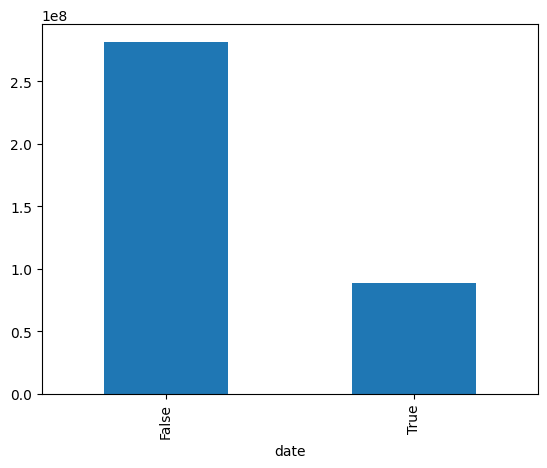

In [23]:
# DF_Index[
#     (DF_Index['country'] == "US") &
#     (DF_Index['province']) &
#     (DF_Index['date'].between('2021-01-01','2021-31-12'))
#     ].groupby(['date', 'province', 'confirmed'])['confirmed'].sum().plot(kind='bar')

# dateRange = DF_Index[DF_Index['date'].between('2021-01-01', '2021-12-31')]

DF_Index[DF_Index['country'] == 'US'].groupby(DF_Index['date'].between('2021-01-01', '2021-12-31'))['confirmed'].sum().plot(kind='bar')

In [24]:
DF_Index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34391 entries, 0 to 34390
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   province   34391 non-null  object
 1   country    34391 non-null  object
 2   date       34391 non-null  object
 3   confirmed  34391 non-null  int64 
 4   deaths     34391 non-null  int64 
 5   year_id    34391 non-null  int64 
 6   survive    34391 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.8+ MB


In [25]:
DF_2021Conf = DF_Index.loc[DF_Index['date'].between('2021-01-01', '2021-01-31')]

<AxesSubplot: xlabel='country'>

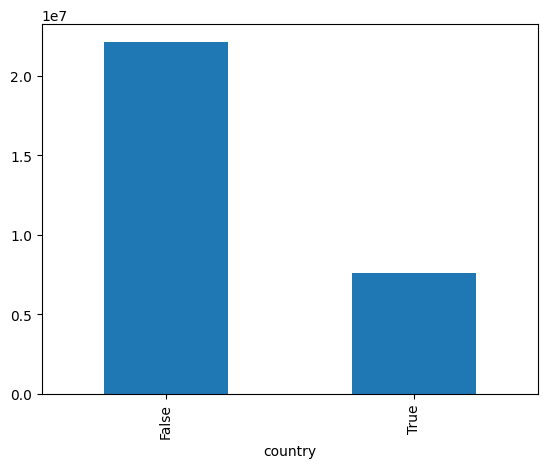

In [26]:
DF_2021Conf.groupby([DF_2021Conf['province']] and [DF_Index['country'] == 'US'])['confirmed'].sum().plot(kind='bar')

<AxesSubplot: xlabel='country'>

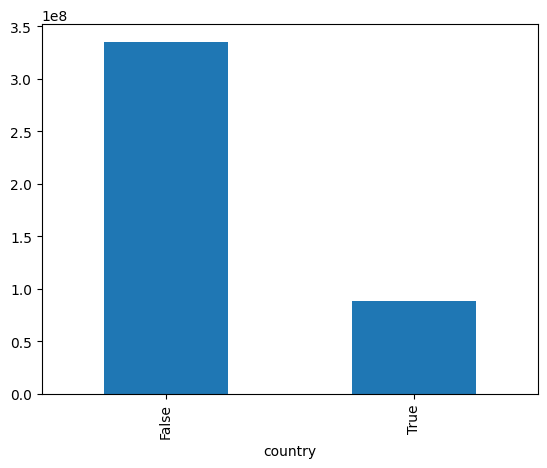

In [27]:
DF_Index[DF_Index['date'].between('2021-01-01', '2021-12-31')].groupby([DF_Index['country'] == 'US'])['confirmed'].sum().plot(kind='bar')

In [28]:
# testDF1[testDF1['year_id'] <= 2022].groupby([testDF1['Country/Province'] == 'USD'])['confirmed'].sum().plot(kind="bar")

# DF_Index[DF_Index['year_id'] <= 2021].groupby([DF_Index['country'] == "US"])['confirmed'].sum().plot(kind="bar")

# DF_Index.plot(x=(DF_Index['year_id'] <= 2021), y="confirmed", kind="bar")

# DF_Index[DF_2021Conf].groupby([DF_Index['country'] == "US"])['confirmed'].sum().plot(kind='bar')

In [29]:
print("Total Data: ", DF_Index[DF_Index['year_id'] <= 2022]['confirmed'].sum())

Total Data:  2148993571


In [30]:
# testDF1.loc['2021']
# print("Dataset Confirmed : \n", testDF1)

# idx = pd.IndexSlice
# df_jan2019 = df.loc[idx[:, "2019-01-01":"2019-01-31"], :]
# print("Dataset akhir:\n", df_jan2019)

In [31]:
# Slice DataFrame into only US Country Data

# DataUS = testDF1[(testDF1['province'].notna()) &
#                  (testDF1['country'] == 'US') &
#                  (testDF1['confirmed'].notna()) &
#                  (testDF1['deaths'].notna()) & 
#                  (testDF1['year_id'].notna()) &
#                  (testDF1['survive'].notna())
# ] 

# DataUS

In [32]:
# DataUS.shape

In [33]:
# Import matplotlib

%matplotlib inline

# 1. Total penduduk United States yang terjangkit virus Covid-19 sampai dengan tahun 2021?

In [34]:
# testDF1[testDF1['year_id'] <= 2022].groupby([testDF1['Country/Province'] == 'USD'])['confirmed'].sum().plot(kind="bar")

In [35]:
# # Displaying total confirmed positive of Covid-19 in US under 2021

# DataUS[DataUS['year_id'] <= 2022].groupby("province_state")["confirmed"].sum().plot(kind="bar")

# # yearData[yearData['year_id'] <= 2021].groupby('province_state')['confirmed'].sum().plot(kind='bar')

In [36]:
# Detail of total confirmed positive of Covid-19 in US until period 2021

# DataUS[DataUS["year_id"] <= 2022].groupby("province_state")["confirmed"].sum()

# yearData[yearData['year_id'] <= 2021].groupby('province_state')['confirmed'].sum()

In [37]:
# print("Total Data: ", DataUS[DataUS['year_id'] <= 2022]['confirmed'].sum())

# 2. Total penduduk United States yang meninggal sampai tahun 2022 karena virus Covid-19?

In [38]:
# Displaying total deaths Covid-19 case until 2021

# DataUS[DataUS['year_id'] <= 2022].groupby("province_state")["deaths"].sum().plot(kind="bar")

In [39]:
# Summary of total deaths Covid-19 case until 2021

# DataUS[DataUS['year_id'] <= 2022].groupby("province_state")["deaths"].sum()

In [40]:
# print("Total Data : ", DataUS[DataUS['year_id'] <= 2022]['deaths'].sum())

# 3. Kota mana saja di United States sajakah yang menjadi top 5 pandemi Covid-19?

In [41]:
# Displaying top 5 in US of confirmed Covid-19

# DataUS['confirmed'].value_counts().head(5).plot(kind="bar")

In [42]:
# Summary of total top 5 confirmed in US

# DataUS["province_state"].value_counts().head(5)

# 4. Total penduduk United States yang berhasil sembuh dari Covid-19 sampai dengan tahun 2022?

In [43]:
# Displaying total number of survivor Covid-19

# DataUS[DataUS['year_id'] <= 2022].groupby("province_state")["survive"].sum().plot(kind="bar")

In [44]:
# Summary of total survivor Covid-19 overall

# DataUS[DataUS['year_id'] <= 2022].groupby("province_state")["survive"].sum()

In [45]:
# print("Total Data : ", DataUS[DataUS['year_id'] <= 2022]['survive'].sum())

## Conclusions, Assumptions, Overall Analysis



Based on the data obtained, here are some conclusions
1. The total population in the US that is positive for Covid-19 during 2022 is 369861801 people
2. A total of 5039247 died due to Covid-19 until 2022
3. Texas City, US is the fifth city with the highest number of Covid-19 cases
4. The population who successfully recovered from Covid-19 cases was 364822554 people